# NaN Boxing Benchmarks

In [1]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=2000):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [3]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: DoubleBench, Runs: 100, Runtimes: [4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 2, 2, 2, 2, 3, 3, 2, 5, 4, 2, 4, 2, 3, 4, 2, 3, 5, 3, 4, 3, 5, 2, 3, 3, 3, 3, 2, 2, 5, 4, 4, 3, 4, 3, 3, 2, 5, 3, 2, 3, 3, 6, 3, 2, 5, 2, 4, 3, 2, 3, 5, 3, 3, 5, 3, 3, 2, 3, 2, 3, 2, 6, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 7, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


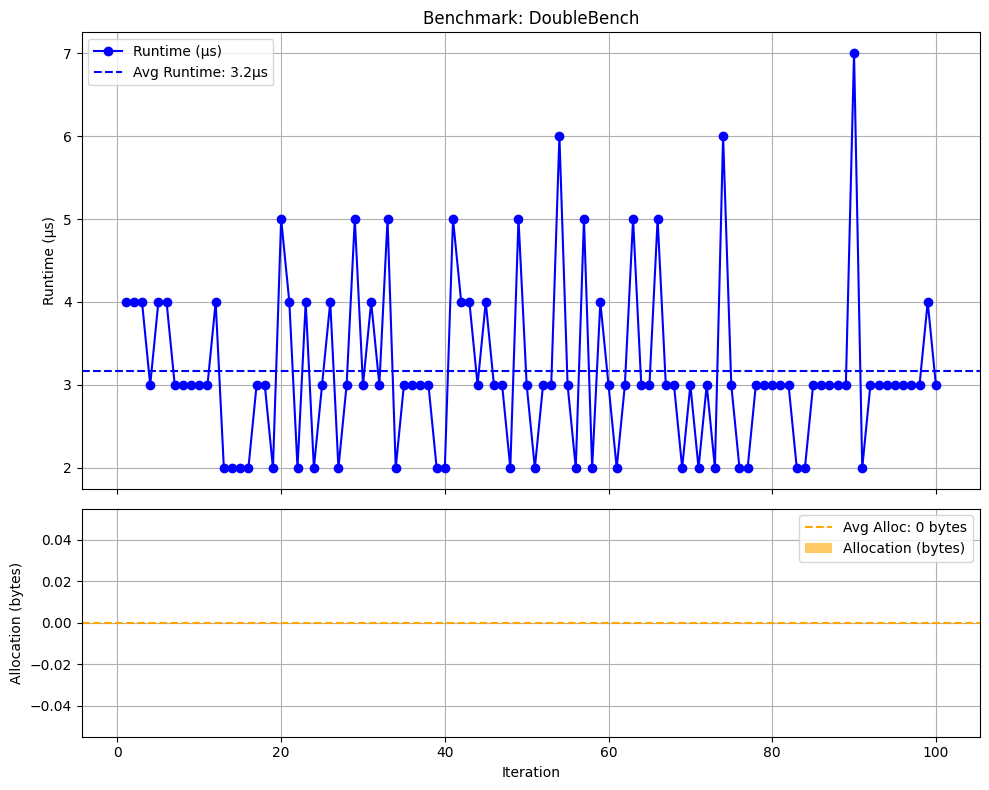

Benchmark: DoubleMedBench, Runs: 100, Runtimes: [10, 11, 10, 7, 7, 9, 7, 7, 7, 7, 6, 7, 7, 10, 7, 7, 7, 11, 9, 7, 7, 7, 10, 7, 6, 7, 7, 6, 7, 7, 6, 7, 8, 8, 10, 7, 6, 6, 6, 9, 8, 8, 8, 7, 7, 7, 8, 7, 6, 7, 7, 7, 6, 7, 6, 7, 6, 7, 11, 7, 9, 7, 10, 8, 7, 7, 7, 9, 6, 6, 7, 6, 7, 6, 8, 6, 7, 7, 6, 9, 6, 7, 7, 6, 7, 6, 6, 7, 7, 8, 7, 8, 7, 6, 7, 6, 9, 9, 7, 6], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


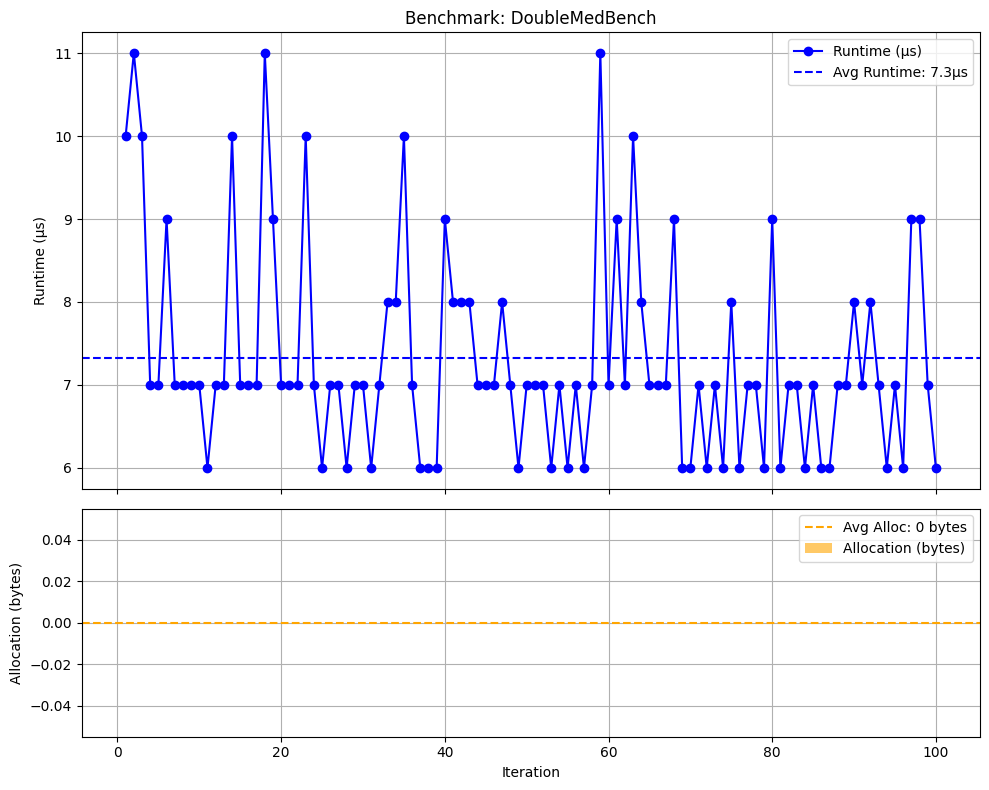

Benchmark: DoubleHighBench, Runs: 100, Runtimes: [11677, 10836, 10805, 10982, 10792, 10996, 10907, 10786, 10860, 10964, 10877, 11762, 11154, 11402, 11134, 11103, 10964, 10966, 10976, 10835, 11098, 10868, 10930, 11077, 10801, 10883, 10903, 10848, 11435, 11121, 10981, 10825, 10955, 11150, 10860, 10953, 11001, 10877, 10997, 10749, 11156, 22926, 11008, 10820, 11046, 10927, 10787, 10906, 11388, 11465, 11444, 11013, 10923, 11008, 10900, 11094, 11000, 10925, 10937, 10818, 11356, 11672, 11683, 11151, 11055, 11157, 10966, 10879, 10942, 10978, 11079, 10863, 10846, 11274, 11086, 11117, 11029, 11117, 10976, 10906, 11288, 10802, 10869, 11162, 11063, 11102, 10942, 10980, 10933, 10991, 11086, 10897, 10759, 10883, 10818, 10769, 10954, 10863, 10826, 10778], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

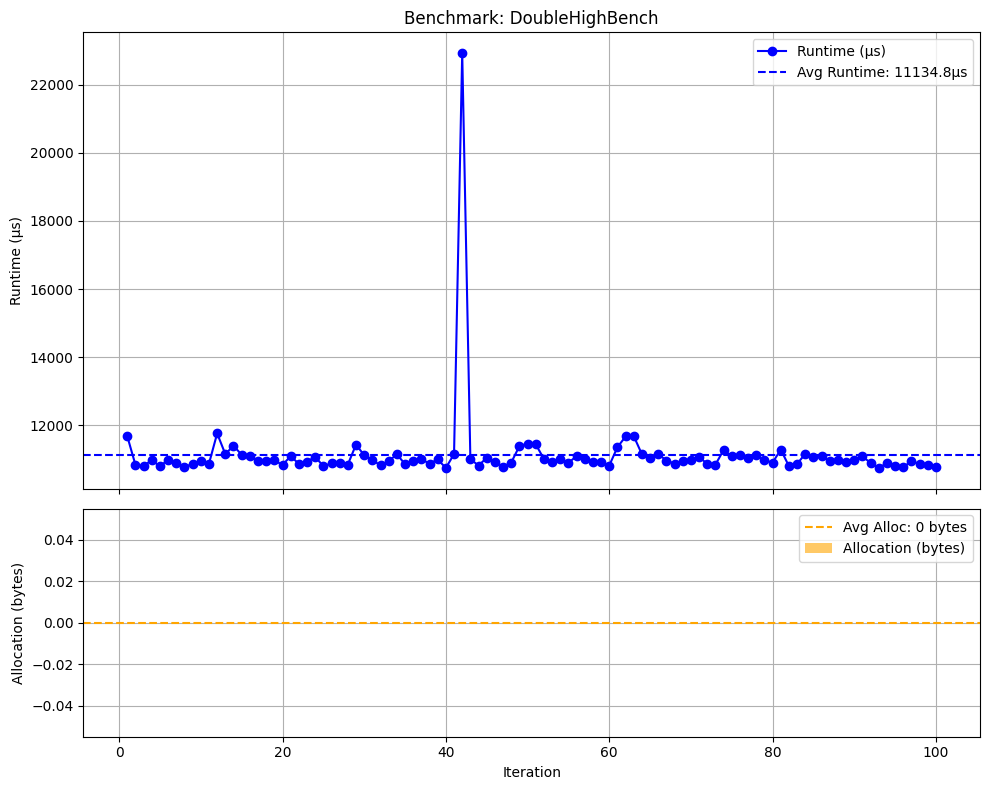

Benchmark: DoubleSqrtBench, Runs: 100, Runtimes: [1957, 1127, 1088, 1184, 1166, 1086, 1102, 1221, 1174, 1119, 1081, 1089, 1114, 1128, 1101, 1083, 1093, 1087, 1083, 1082, 1128, 1118, 1164, 1104, 1110, 1096, 1254, 1126, 1145, 1121, 1321, 1119, 1106, 1113, 1115, 1143, 1113, 1110, 1120, 1101, 1082, 1121, 1140, 1110, 1162, 1124, 1122, 1145, 1105, 1087, 1108, 1080, 1077, 1131, 1118, 1120, 1350, 1103, 1133, 1106, 1199, 1082, 1141, 1108, 1104, 1210, 1108, 1132, 1105, 1125, 1088, 1168, 1194, 1108, 1102, 1116, 1123, 1089, 1097, 1165, 1130, 1085, 1103, 1123, 1108, 1112, 1099, 1103, 1100, 1123, 1113, 1108, 1287, 1093, 1092, 1111, 1200, 1081, 1079, 1098], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


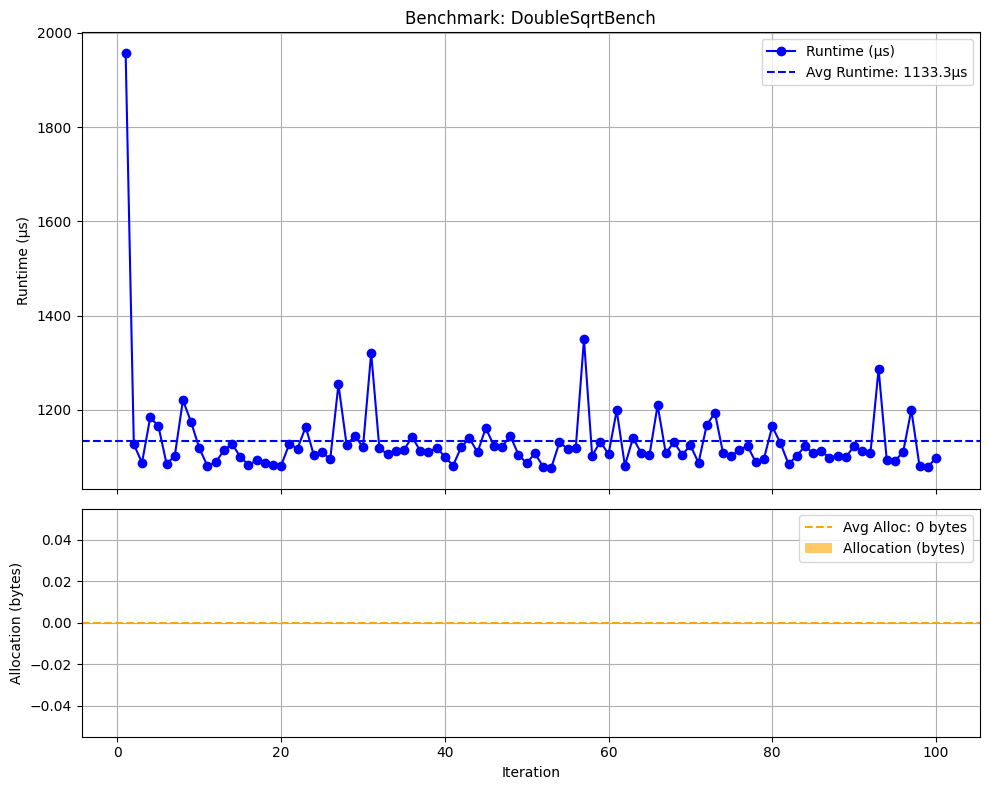

Benchmark: DoubleLExpBench, Runs: 100, Runtimes: [36, 38, 31, 31, 31, 31, 31, 32, 33, 40, 32, 33, 32, 32, 31, 34, 32, 37, 31, 36, 34, 36, 35, 32, 31, 31, 31, 32, 31, 31, 34, 31, 39, 32, 34, 32, 32, 32, 31, 31, 32, 41, 32, 31, 38, 32, 32, 31, 35, 31, 31, 31, 30, 31, 31, 32, 39, 31, 54, 31, 31, 32, 31, 62, 39, 32, 30, 32, 44, 33, 35, 32, 36, 32, 36, 37, 36, 32, 39, 32, 31, 30, 42, 31, 31, 31, 32, 37, 31, 31, 31, 31, 31, 31, 32, 30, 32, 31, 30, 32], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


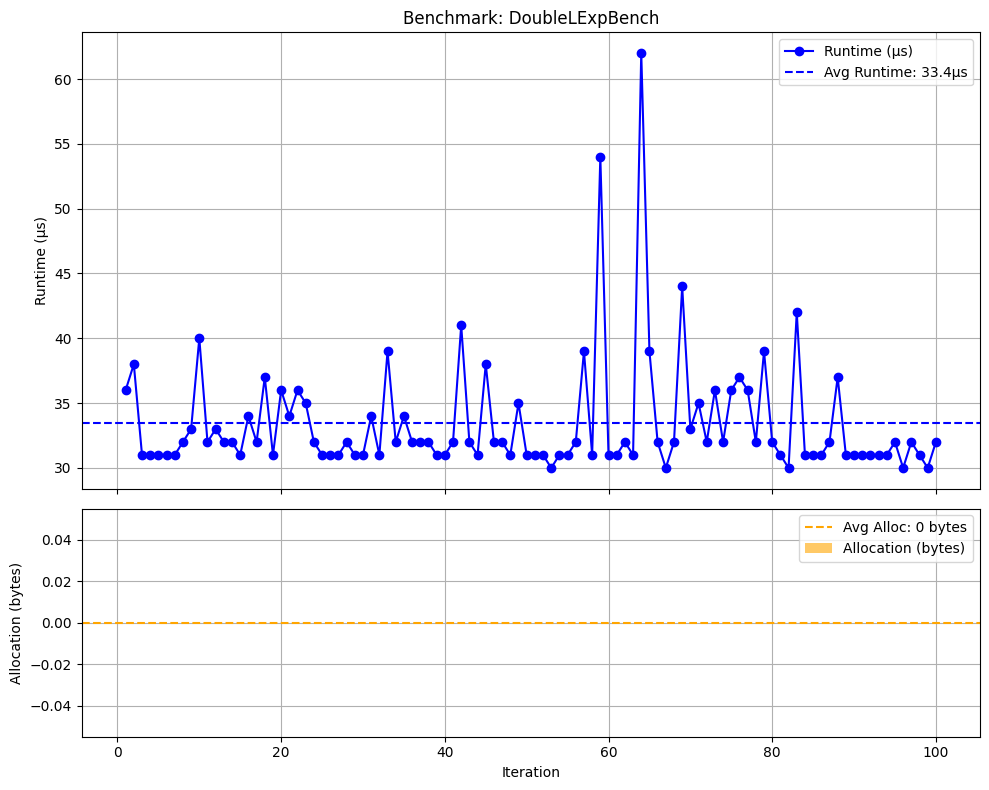

Benchmark: IntegerBench, Runs: 100, Runtimes: [3, 4, 3, 3, 3, 3, 3, 3, 3, 2, 4, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 2, 4, 6, 2, 3, 4, 4, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 4, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


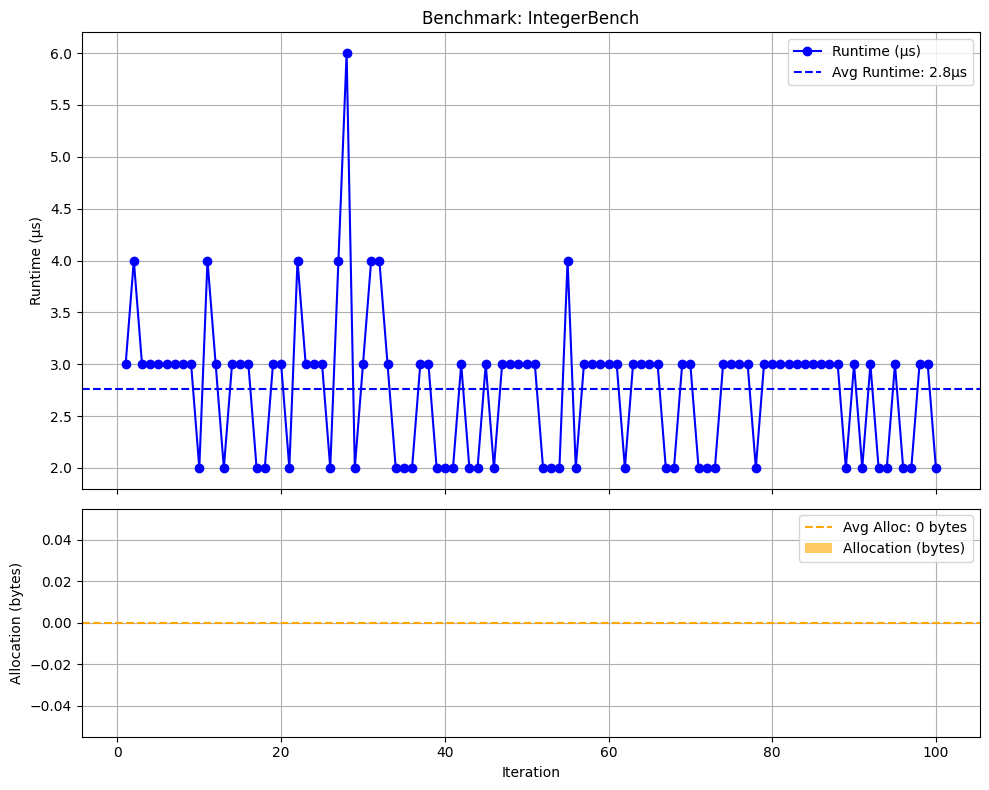

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [23, 15, 11, 11, 29, 12, 12, 11, 10, 11, 10, 10, 10, 14, 16, 10, 15, 11, 12, 13, 11, 11, 10, 11, 12, 14, 11, 12, 11, 11, 10, 10, 11, 11, 11, 10, 11, 13, 10, 10, 11, 11, 11, 10, 10, 11, 11, 10, 10, 10, 10, 10, 9, 12, 11, 10, 11, 11, 11, 10, 10, 10, 10, 10, 10, 15, 10, 10, 18, 12, 11, 11, 11, 11, 11, 10, 11, 13, 10, 15, 15, 10, 14, 11, 11, 11, 9, 11, 10, 15, 11, 11, 15, 14, 14, 11, 10, 12, 10, 12], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


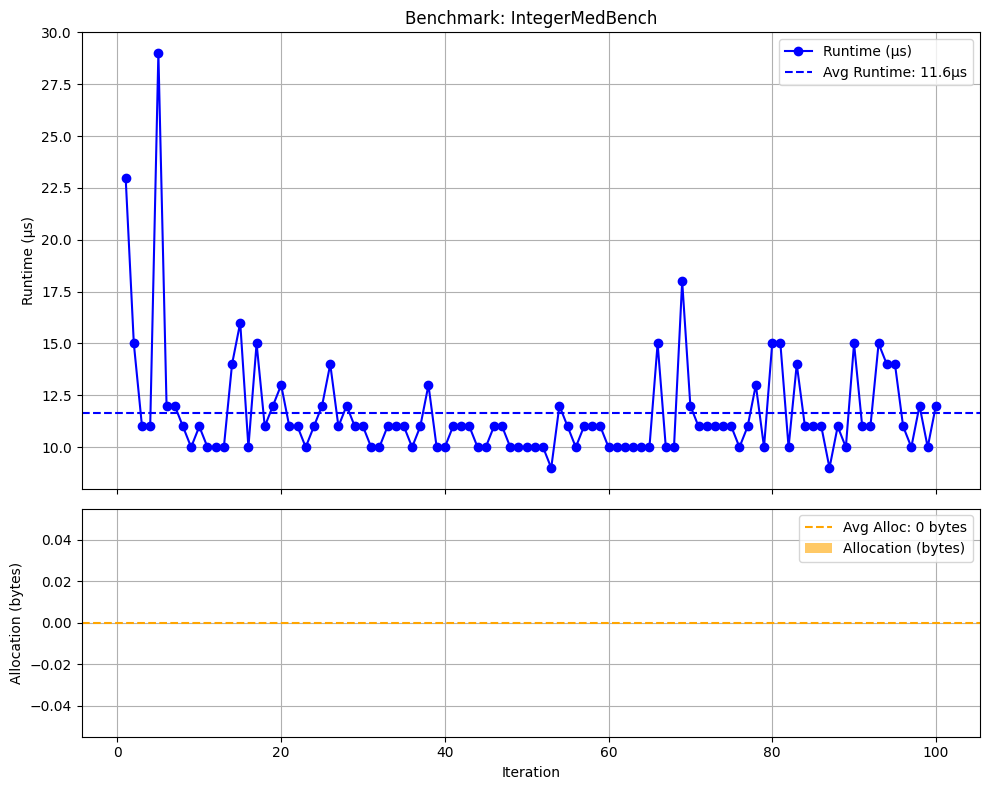

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [78, 69, 67, 75, 66, 66, 71, 71, 79, 68, 68, 67, 67, 67, 73, 66, 67, 69, 74, 75, 66, 84, 68, 70, 71, 67, 70, 76, 67, 69, 73, 70, 80, 72, 67, 67, 69, 74, 72, 67, 66, 71, 69, 96, 71, 76, 71, 67, 84, 70, 68, 70, 72, 67, 72, 70, 72, 67, 72, 66, 75, 70, 67, 69, 66, 70, 67, 68, 76, 69, 66, 70, 71, 72, 73, 70, 71, 70, 72, 70, 75, 70, 69, 70, 66, 70, 71, 114, 67, 72, 69, 71, 68, 76, 69, 69, 69, 72, 67, 75], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


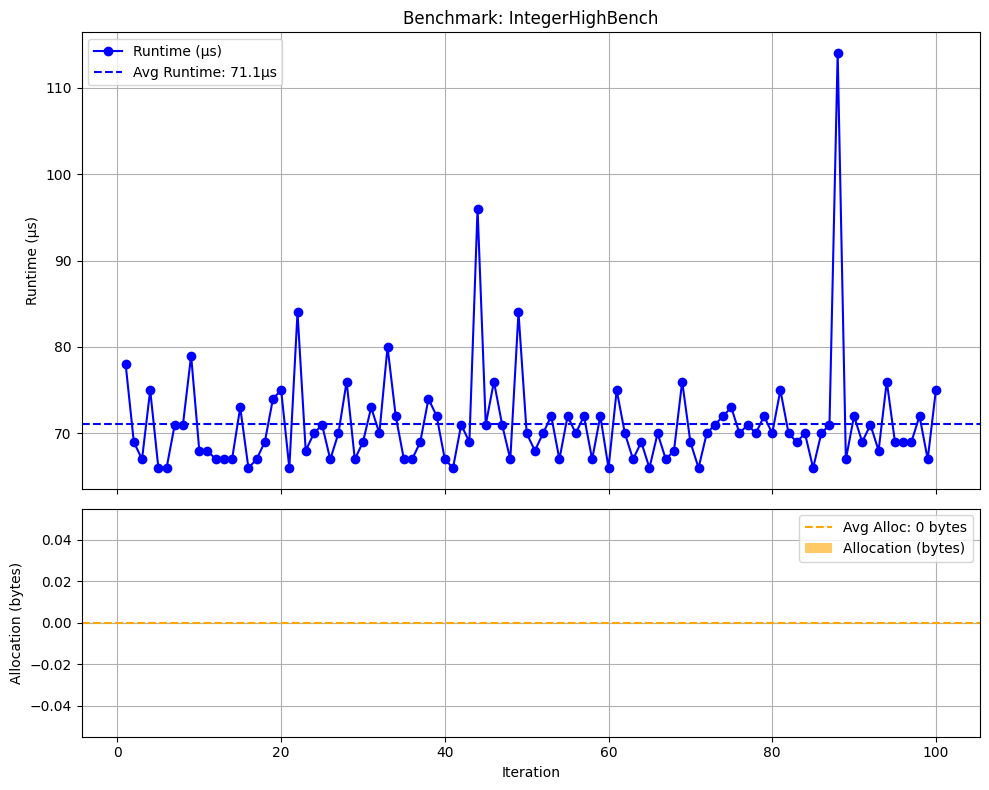

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [52, 118, 126, 56, 48, 52, 53, 56, 48, 50, 48, 48, 51, 48, 49, 49, 49, 48, 49, 48, 61, 49, 48, 47, 49, 47, 48, 48, 53, 48, 48, 52, 46, 48, 51, 51, 49, 50, 51, 47, 48, 50, 52, 49, 49, 47, 47, 57, 52, 51, 55, 48, 51, 48, 48, 52, 52, 48, 51, 50, 53, 49, 48, 49, 62, 48, 52, 48, 53, 48, 48, 47, 56, 49, 48, 47, 65, 52, 51, 48, 47, 55, 59, 53, 49, 57, 49, 49, 52, 49, 47, 52, 48, 51, 48, 51, 49, 48, 48, 48], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


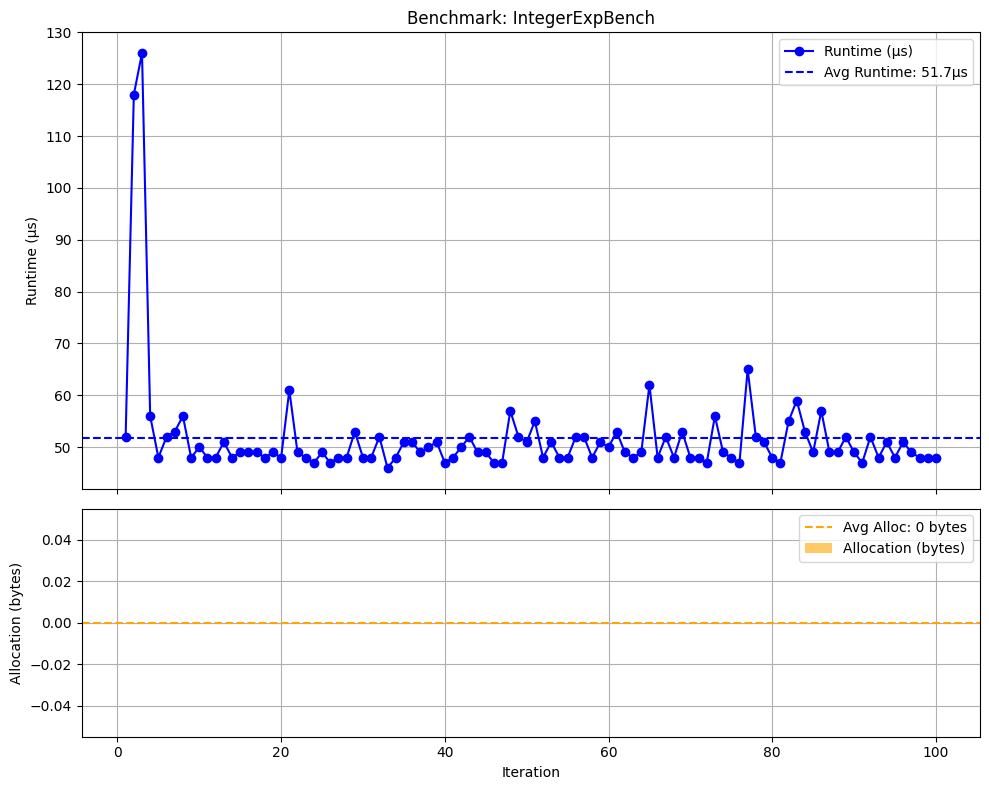

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [598, 521, 543, 584, 536, 536, 526, 538, 534, 557, 559, 580, 529, 550, 551, 551, 531, 520, 539, 543, 536, 517, 550, 526, 552, 538, 548, 546, 558, 601, 563, 537, 530, 554, 557, 575, 576, 532, 621, 544, 534, 514, 516, 538, 525, 517, 526, 520, 525, 571, 549, 526, 549, 555, 553, 537, 578, 543, 540, 539, 541, 593, 545, 526, 552, 532, 556, 607, 541, 539, 689, 610, 524, 531, 551, 564, 562, 538, 550, 548, 543, 534, 535, 531, 530, 535, 535, 551, 553, 559, 531, 556, 524, 570, 573, 528, 533, 530, 564, 523], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331

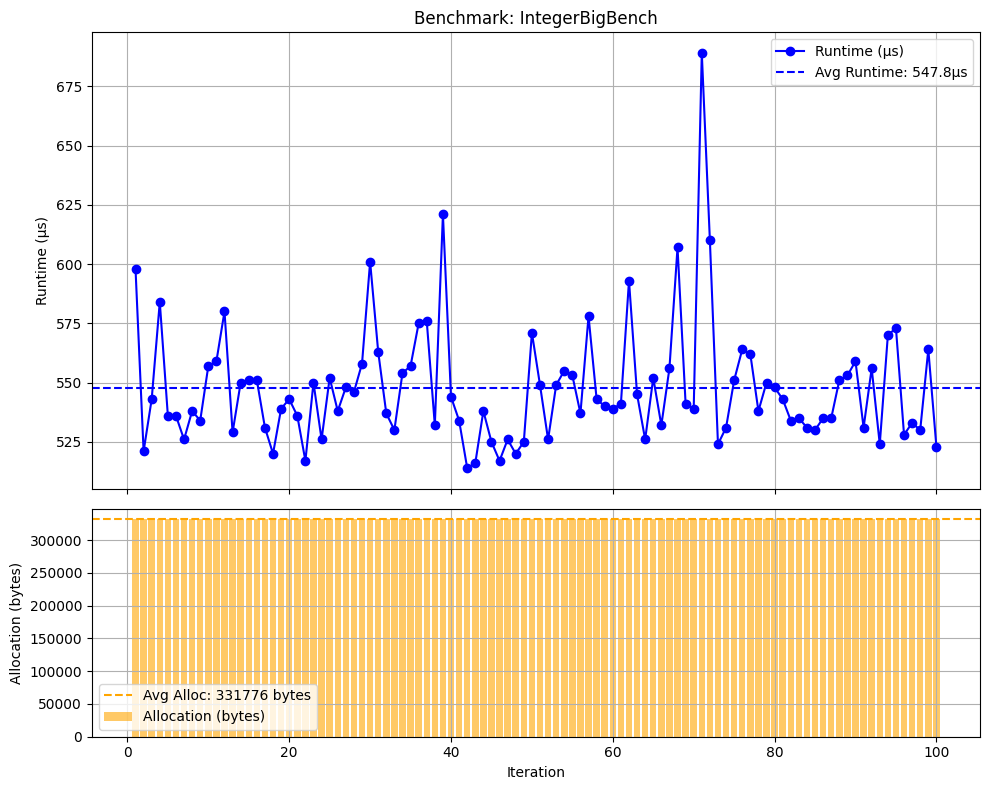

In [4]:
# General Configuration
BENCHMARKS = [
    "DoubleBench",
    "DoubleMedBench",
    "DoubleHighBench",
    "DoubleSqrtBench",
    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])